# Analyzing Manage File Transfer

In this exercise, you train an ML model to determine whether a File Transfer instance is classified as malicious, suspicious or benign.

The exercise uses the _filetransfersccm_ data set from non production Sterling Lab environment. 
The data set consists of approximately 800 file transfers inbound and outbound which are classifed on the above categories.
The data includes features such as blood pressure, heart rate, and age.
The data set is available as a CSV file in this repository.

Explore the data to recognize whether you can use it to train a model that recognizes patients who have diabetes.

> _NOTE:  In the interest of time, this notebook performs a simple and superficial analysis of the data.
A more detailed study would require more time._

### 1. Import the required libraries and load the data.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Load the data set into a Pandas data frame called "data"
data = pd.read_csv("data/mftinput3.csv")

# Obtain the length (rows) and width (columns) of the data set
data.shape

(100, 13)

The data contains 100 rows and 13 columns.  

Use the `head` method  of the Pandas dataframe to preview the first five rows.

In [5]:
data.head()

,size_cat,File Size,Time Between Transfers,Source IP,Destination IP,Is Executable,Is Compressed,Source Country,Destination Country,File Type,Time of Day,Day of Week,Outcome
0,XL,5573,97,119.66.190.188,99.90.233.173,0,0,external,external,csv,12:46,Sunday,0
1,XL,6164,97,196.76.133.189,138.109.176.170,0,0,hybrid,hybrid,pdf,10:42,Thursday,0
2,XL,4517,46,59.67.36.208,205.119.152.202,0,0,external,external,pdf,12:00,Sunday,1
3,XL,5693,85,34.244.247.92,133.37.150.211,0,0,external,hybrid,pdf,11:55,Saturday,1
4,XL,7186,14,204.44.130.79,61.120.219.105,1,0,hybrid,internal,docx,22:58,Friday,0


### 2. Inspect basic information.

Use standard data analysis methods to start exploring the data.

Inspect the column names and associated data types.
The `info` method of a Pandas data frame displays the column names and data types in a data frame.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   size_cat                100 non-null    object
 1   File Size               100 non-null    int64 
 2   Time Between Transfers  100 non-null    int64 
 3   Source IP               100 non-null    object
 4   Destination IP          100 non-null    object
 5   Is Executable           100 non-null    int64 
 6   Is Compressed           100 non-null    int64 
 7   Source Country          100 non-null    object
 8   Destination Country     100 non-null    object
 9   File Type               100 non-null    object
 10  Time of Day             100 non-null    object
 11  Day of Week             100 non-null    object
 12  Outcome                 100 non-null    int64 
dtypes: int64(5), object(8)
memory usage: 10.3+ KB


Note the different value types:

* `Pregnancies`, `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `Age`, and `Outcome` contain integer values.
* Body mass index(`BMI`) and `DiabetesPedigreeFuntion` contain float values.

Use the `describe` method to see basic statistical information for each column, such as percentiles, mean, and standard deviation.

In [7]:
data.describe()

,File Size,Time Between Transfers,Is Executable,Is Compressed,Outcome
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,5261.820000,52.590000,0.440000,0.480000,0.15000
std,2989.837627,25.355292,0.498888,0.502117,0.35887
min,198.000000,10.000000,0.000000,0.000000,0.00000
25%,2456.250000,31.750000,0.000000,0.000000,0.00000
50%,5712.000000,50.500000,0.000000,0.000000,0.00000
75%,7840.500000,72.250000,1.000000,1.000000,0.00000
max,9996.000000,98.000000,1.000000,1.000000,1.00000



The dataset consists of several file transfer variables, which are the input features, and one target variable: `Outcome`.

* `size_cat`:                file Size Category (XL, L, M, S)
* `file size`:               actual File size in bytes
* `time between transfers`:  minutes between actual transfers and last
* `source IP`:               producer
* `destination ip`:          consumer
* `is executable?`:          0=n 1=y
* `is compressed`            0=n 1=y
* `source contry`:           partner type (external internal)
* `destination contry`:      partner type (external internal)
* `file type`:               type of file being transfered (pdf csv txt)
* `time of day`:             time of day of file transfer
* `day of week`:             day of week of file transfer
* `Outcome`:                 target variable. Whether the file transfer content is malicious (`1`) or not (`0`)

Count the number are malicious cases.

In [8]:
data.Outcome.value_counts()

Outcome
0    85
1    15
Name: count, dtype: int64

15 of 100 cases are malicious file transfer cases.

### 3. Identify missing data

Plot the data to visualize the data distribution.
Use the `hist` method to plot a histogram.
You can use histograms to see how the data is distributed for each variable and detect outliers.

array([[<Axes: title={'center': 'File Size'}>,
        <Axes: title={'center': 'Time Between Transfers'}>],
       [<Axes: title={'center': 'Is Executable'}>,
        <Axes: title={'center': 'Is Compressed'}>],
       [<Axes: title={'center': 'Outcome'}>, <Axes: >]], dtype=object)

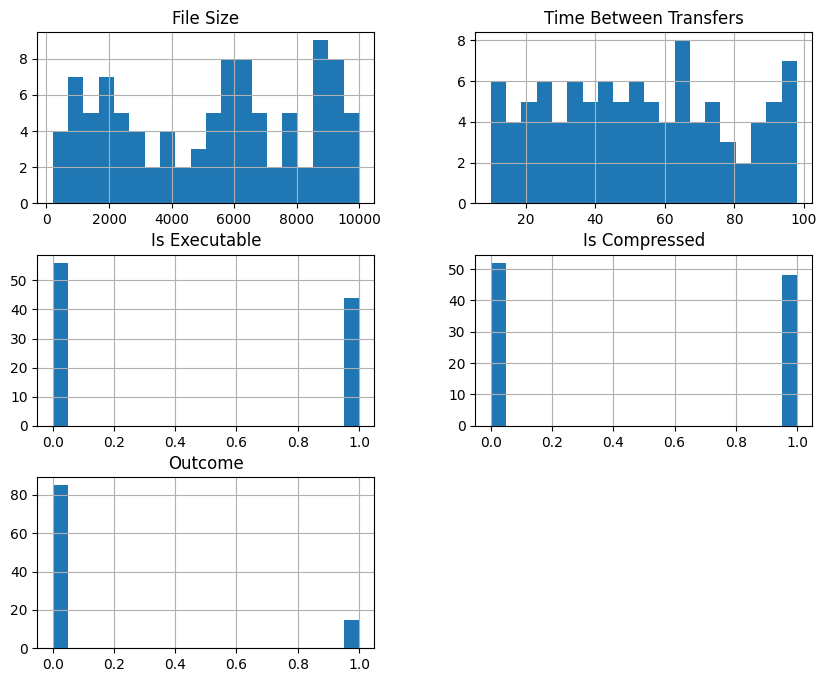

In [9]:
# Plot histograms of the columns on multiple subplots
plt.close('all')
data.hist(bins=20, figsize=(10, 8))

The dataset is evenly distributed .


Reuse the `head` method to see the `0` values in the data. Print the first 20 rows.

In [10]:
data.head(20)

,size_cat,File Size,Time Between Transfers,Source IP,Destination IP,Is Executable,Is Compressed,Source Country,Destination Country,File Type,Time of Day,Day of Week,Outcome
0,XL,5573,97,119.66.190.188,99.90.233.173,0,0,external,external,csv,12:46,Sunday,0
1,XL,6164,97,196.76.133.189,138.109.176.170,0,0,hybrid,hybrid,pdf,10:42,Thursday,0
2,XL,4517,46,59.67.36.208,205.119.152.202,0,0,external,external,pdf,12:00,Sunday,1
3,XL,5693,85,34.244.247.92,133.37.150.211,0,0,external,hybrid,pdf,11:55,Saturday,1
4,XL,7186,14,204.44.130.79,61.120.219.105,1,0,hybrid,internal,docx,22:58,Friday,0
5,XL,6859,85,11.63.58.147,189.164.145.13,0,1,external,internal,docx,1:37,Thursday,0
6,XL,5731,12,237.147.95.210,35.83.38.227,1,1,external,internal,pdf,11:14,Friday,1
7,L,8845,22,118.109.177.31,150.146.63.156,1,0,external,internal,docx,3:17,Sunday,0
8,L,9434,62,137.221.60.50,61.202.92.95,0,1,external,external,txt,10:03,Saturday,0
9,L,1955,24,5.253.6.240,162.224.2.135,1,1,hybrid,hybrid,csv,8:09,Saturday,0


Print the last 20 rows of the dataset and determine if those rows also contain `0` values.

In [11]:
data.tail(20)

,size_cat,File Size,Time Between Transfers,Source IP,Destination IP,Is Executable,Is Compressed,Source Country,Destination Country,File Type,Time of Day,Day of Week,Outcome
80,M,9508,34,242.29.126.140,61.141.185.19,0,0,internal,internal,pdf,15:47,Thursday,0
81,M,2708,76,36.47.170.97,74.156.147.61,0,0,internal,internal,pdf,4:37,Wednesday,0
82,M,1956,43,85.34.178.112,83.49.90.82,1,1,hybrid,hybrid,csv,7:28,Thursday,0
83,M,7490,31,145.125.103.103,244.157.31.17,1,0,hybrid,internal,pdf,8:12,Sunday,0
84,M,9426,21,41.76.46.160,88.60.200.172,1,1,external,internal,txt,20:51,Sunday,0
85,M,4576,21,137.74.63.243,130.144.94.41,1,1,external,internal,txt,4:52,Tuesday,0
86,M,2000,35,119.33.249.33,85.200.136.170,0,1,hybrid,internal,docx,19:35,Sunday,0
87,M,8589,64,222.227.242.232,159.14.42.168,1,1,external,internal,pdf,20:44,Thursday,1
88,M,9692,91,122.85.223.248,49.35.23.165,0,1,external,internal,txt,17:05,Sunday,0
89,M,6280,43,27.78.32.57,157.46.60.68,0,0,hybrid,hybrid,pdf,4:23,Saturday,0


Determine the number of `0` values in the dataset.

In [12]:
# Select all the rows and only the feature columns
feature_data = data.iloc[:, :-1]

# Count the total number of rows
num_cases = data.shape[0]

# Number & percent of '0's for each feature
numZero = (feature_data[:] == 0).sum()
perZero = ((feature_data[:] == 0).sum())/num_cases*100

print(f"\nRows, Feature columns: {feature_data.shape}")
print("\n== Number of 0's:")
print(numZero)
print("\n == Percentage of 0's:")
print(perZero)


Rows, Feature columns: (100, 12)

== Number of 0's:
size_cat                   0
File Size                  0
Time Between Transfers     0
Source IP                  0
Destination IP             0
Is Executable             56
Is Compressed             52
Source Country             0
Destination Country        0
File Type                  0
Time of Day                0
Day of Week                0
dtype: int64

 == Percentage of 0's:
size_cat                   0.0
File Size                  0.0
Time Between Transfers     0.0
Source IP                  0.0
Destination IP             0.0
Is Executable             56.0
Is Compressed             52.0
Source Country             0.0
Destination Country        0.0
File Type                  0.0
Time of Day                0.0
Day of Week                0.0
dtype: float64


The data set contains 56 zero values for `is executable` and 52 zero values for `is compressed`.
Aproximately half of the file transfers have a comprssed file and/or executable binary file.

To build and train a reliable ML model, you should address any missing values.
However, for the sake of simplicity, this exercise do not have missing values and/or  outliers in the dataset.

Verify whether if there are any missing data values.

## References

*File Transfer records were generated by extracting data from a Control Center Monitor instance database in a non production lab environment.